#  LogisticRegression-EmissionsHighGranularity Metrics

## Model Objectives:
- Dataset (emissions_high_granularity)
- Using logistic regression model in this context is to predict whether the emissions level (i.e., total_emissions_MtCO2e) for a given observation      falls into the "High" or "Low" category.
- To classify the emissions level based on standard.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, roc_auc_score, classification_report)


## Load the Dataset

In [2]:
df = pd.read_csv('emissions_high_granularity.csv')

In [3]:
# Creating the emissions_category column
df['emissions_category'] = df['total_emissions_MtCO2e'].apply(lambda x: 'High' if x > 50 else 'Low')

# Save DataFrame to CSV
df.to_csv('emissions_high_granularity.csv', index=False)

print('Successfully saved')


# Successfully saved

Successfully saved


## Checking Dataset Structures

In [4]:
df.info()


# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 169 entries, 0 to 168
# Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
# ---  ------                              --------------  -----  
# 0   year                                169 non-null    int64  
# 1   parent_entity                       169 non-null    object 
# 2   parent_type                         169 non-null    object 
# 3   reporting_entity                    169 non-null    object 
# 4   commodity                           169 non-null    object 
# 5   production_value                    169 non-null    float64
# 6   production_unit                     169 non-null    object 
# 7   product_emissions_MtCO2             169 non-null    float64
# 8   flaring_emissions_MtCO2             169 non-null    float64
# 9   venting_emissions_MtCO2             169 non-null    float64
# 10  own_fuel_use_emissions_MtCO2        169 non-null    float64
# 11  fugitive_methane_emissions_MtCO2e   169 non-null    float64
# 12  fugitive_methane_emissions_MtCH4    169 non-null    float64
# 13  total_operational_emissions_MtCO2e  169 non-null    float64
# 14  total_emissions_MtCO2e              169 non-null    float64
# 15  emissions_category                  169 non-null    object 
# dtypes: float64(9), int64(1), object(6)
# memory usage: 21.3+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   year                                169 non-null    int64  
 1   parent_entity                       169 non-null    object 
 2   parent_type                         169 non-null    object 
 3   reporting_entity                    169 non-null    object 
 4   commodity                           169 non-null    object 
 5   production_value                    169 non-null    float64
 6   production_unit                     169 non-null    object 
 7   product_emissions_MtCO2             169 non-null    float64
 8   flaring_emissions_MtCO2             169 non-null    float64
 9   venting_emissions_MtCO2             169 non-null    float64
 10  own_fuel_use_emissions_MtCO2        169 non-null    float64
 11  fugitive_methane_emissions_MtCO2e   169 non-n

In [5]:
df.head(3)


#   year	parent_entity	parent_type	reporting_entity	commodity	production_value	production_unit	product_emissions_MtCO2	flaring_emissions_MtCO2	venting_emissions_MtCO2	own_fuel_use_emissions_MtCO2	fugitive_methane_emissions_MtCO2e	fugitive_methane_emissions_MtCH4	total_operational_emissions_MtCO2e	total_emissions_MtCO2e	emissions_category
#0	1854	Adaro Energy	Investor-owned Company	Adaro Energy	Sub-Bituminous Coal	50.90	Million tonnes/yr	92.3401	0.0	0.0	0.0	10.4316	0.3726	10.4316	102.7717	High
#1	1855	Adaro Energy	Investor-owned Company	Adaro Energy	Metallurgical Coal	0.90	Million tonnes/yr	2.3989	0.0	0.0	0.0	0.2710	0.0097	0.2710	2.6700	Low
#2	1856	Adaro Energy	Investor-owned Company	Adaro Energy	Sub-Bituminous Coal	48.23	Million tonnes/yr	87.4963	0.0	0.0	0.0	9.8844	0.3530	9.8844	97.3807	High


,year,parent_entity,parent_type,reporting_entity,commodity,production_value,production_unit,product_emissions_MtCO2,flaring_emissions_MtCO2,venting_emissions_MtCO2,own_fuel_use_emissions_MtCO2,fugitive_methane_emissions_MtCO2e,fugitive_methane_emissions_MtCH4,total_operational_emissions_MtCO2e,total_emissions_MtCO2e,emissions_category
0,1854,Adaro Energy,Investor-owned Company,Adaro Energy,Sub-Bituminous Coal,50.90,Million tonnes/yr,92.3401,0.0,0.0,0.0,10.4316,0.3726,10.4316,102.7717,High
1,1855,Adaro Energy,Investor-owned Company,Adaro Energy,Metallurgical Coal,0.90,Million tonnes/yr,2.3989,0.0,0.0,0.0,0.2710,0.0097,0.2710,2.6700,Low
2,1856,Adaro Energy,Investor-owned Company,Adaro Energy,Sub-Bituminous Coal,48.23,Million tonnes/yr,87.4963,0.0,0.0,0.0,9.8844,0.3530,9.8844,97.3807,High


In [6]:
df.columns


# Index(['year', 'parent_entity', 'parent_type', 'reporting_entity', 'commodity',
#       'production_value', 'production_unit', 'product_emissions_MtCO2',
#       'flaring_emissions_MtCO2', 'venting_emissions_MtCO2',
#       'own_fuel_use_emissions_MtCO2', 'fugitive_methane_emissions_MtCO2e',
#       'fugitive_methane_emissions_MtCH4',
#       'total_operational_emissions_MtCO2e', 'total_emissions_MtCO2e',
#       'emissions_category'],
#     dtype='object')

Index(['year', 'parent_entity', 'parent_type', 'reporting_entity', 'commodity',
       'production_value', 'production_unit', 'product_emissions_MtCO2',
       'flaring_emissions_MtCO2', 'venting_emissions_MtCO2',
       'own_fuel_use_emissions_MtCO2', 'fugitive_methane_emissions_MtCO2e',
       'fugitive_methane_emissions_MtCH4',
       'total_operational_emissions_MtCO2e', 'total_emissions_MtCO2e',
       'emissions_category'],
      dtype='object')

In [7]:
df.shape


# (169, 16)

(169, 16)

In [8]:
df.describe().T



#               	                   count	    mean	     std	      min	       25%	      50%	       75%      	max
#      year	                           169.0	 1938.000000	48.930222	  1854.0000	  1896.0000	  1938.0000	   1980.0000	2022.0000
# production_value	                   169.0	517.610641	    638.228700	  0.2200	  26.7800     294.1827	   779.3000	    2689.4303
# product_emissions_MtCO2	           169.0	103.311733	   122.626849	  0.0985	  15.3799	  63.6150	   129.0338	    501.6130
# flaring_emissions_MtCO2	           169.0	 1.220998	   2.116210	      0.0000	  0.0000	  0.0646	   1.7422	    7.9980
# venting_emissions_MtCO2	           169.0	 0.758836	   0.970974  	  0.0000	  0.0000	  0.4188	   1.1094	    4.1005
# own_fuel_use_emissions_MtCO2         169.0    0.947757	    1.958714	  0.0000   	  0.0000	  0.0000	   0.7779	    8.2293
# fugitive_methane_emissions_MtCO2e	   169.0	9.959031	   9.464944	      0.0183	  2.1448	  7.2107	   14.9693      39.7481
# fugitive_methane_emissions_MtCH4	   169.0	0.355678	   0.338033	      0.0007	  0.0766	  0.2575	   0.5346	    1.4196
# total_operational_emissions_MtCO2e   169.0	12.886622	  12.752361  	  0.0250	  2.2339	  8.6629	   19.9125      52.3273
# total_emissions_MtCO2e	           169.0    116.198352	  131.234395	  0.1344	  17.3642	  74.0578	   144.2469 	538.5495

,count,mean,std,min,25%,50%,75%,max
year,169.0,1938.000000,48.930222,1854.0000,1896.0000,1938.0000,1980.0000,2022.0000
production_value,169.0,517.610641,638.228700,0.2200,26.7800,294.1827,779.3000,2689.4303
product_emissions_MtCO2,169.0,103.311733,122.626849,0.0985,15.3799,63.6150,129.0338,501.6130
flaring_emissions_MtCO2,169.0,1.220998,2.116210,0.0000,0.0000,0.0646,1.7422,7.9980
venting_emissions_MtCO2,169.0,0.758836,0.970974,0.0000,0.0000,0.4188,1.1094,4.1005
own_fuel_use_emissions_MtCO2,169.0,0.947757,1.958714,0.0000,0.0000,0.0000,0.7779,8.2293
fugitive_methane_emissions_MtCO2e,169.0,9.959031,9.464944,0.0183,2.1448,7.2107,14.9693,39.7481
fugitive_methane_emissions_MtCH4,169.0,0.355678,0.338033,0.0007,0.0766,0.2575,0.5346,1.4196
total_operational_emissions_MtCO2e,169.0,12.886622,12.752361,0.0250,2.2339,8.6629,19.9125,52.3273
total_emissions_MtCO2e,169.0,116.198352,131.234395,0.1344,17.3642,74.0578,144.2469,538.5495


## Perform EDA

In [9]:
# no EDA to perform in this model as the focus is just on a simple pipeline and how it works...
df.isna().sum()



#year                                  0
#parent_entity                         0
#parent_type                           0
#reporting_entity                      0
#commodity                             0
#production_value                      0
#production_unit                       0
#product_emissions_MtCO2               0
#flaring_emissions_MtCO2               0
#venting_emissions_MtCO2               0
#own_fuel_use_emissions_MtCO2          0
#fugitive_methane_emissions_MtCO2e     0
#fugitive_methane_emissions_MtCH4      0
#total_operational_emissions_MtCO2e    0
#total_emissions_MtCO2e                0
#emissions_category                    0
#dtype: int64


year                                  0
parent_entity                         0
parent_type                           0
reporting_entity                      0
commodity                             0
production_value                      0
production_unit                       0
product_emissions_MtCO2               0
flaring_emissions_MtCO2               0
venting_emissions_MtCO2               0
own_fuel_use_emissions_MtCO2          0
fugitive_methane_emissions_MtCO2e     0
fugitive_methane_emissions_MtCH4      0
total_operational_emissions_MtCO2e    0
total_emissions_MtCO2e                0
emissions_category                    0
dtype: int64

## Prepare the data for Modeling

In [10]:
X =  df.drop(columns= ['parent_entity', 'parent_type', 'reporting_entity', 'commodity',
        'production_unit','flaring_emissions_MtCO2', 'venting_emissions_MtCO2',
       'own_fuel_use_emissions_MtCO2', 'fugitive_methane_emissions_MtCH4', 'total_emissions_MtCO2e',
       'emissions_category'])
y = df['emissions_category']

In [11]:
X.head(3)


#	year	production_value	product_emissions_MtCO2	fugitive_methane_emissions_MtCO2e	total_operational_emissions_MtCO2e
#0	1854	50.90	                            92.3401	                          10.4316	                          10.4316
#1	1855	0.90	                            2.3989	                          0.2710	                          0.2710
#2	1856	48.23	                            87.4963	                          9.8844	                         9.8844


,year,production_value,product_emissions_MtCO2,fugitive_methane_emissions_MtCO2e,total_operational_emissions_MtCO2e
0,1854,50.90,92.3401,10.4316,10.4316
1,1855,0.90,2.3989,0.2710,0.2710
2,1856,48.23,87.4963,9.8844,9.8844


In [12]:
# one.hot enconding
X = pd.get_dummies(X,drop_first=True)
X.head(2)



# 	year	production_value	product_emissions_MtCO2	fugitive_methane_emissions_MtCO2e	total_operational_emissions_MtCO2e
#0	1854	           50.9	                     92.3401	                      10.4316	                           10.4316
#1	1855	           0.9	                     2.3989	                          0.2710	                           0.2710


,year,production_value,product_emissions_MtCO2,fugitive_methane_emissions_MtCO2e,total_operational_emissions_MtCO2e
0,1854,50.9,92.3401,10.4316,10.4316
1,1855,0.9,2.3989,0.2710,0.2710


## Split the data into train and test sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# ((118, 5), (51, 5), (118,), (51,))

((118, 5), (51, 5), (118,), (51,))

In [15]:
# Must standardize your data
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Explore the prepared data...
X_train


#array([[ 1.52919893e+00,  7.44107077e-01,  2.21720752e+00,
#         1.04214173e+00,  1.11911711e+00],
#       [ 2.20882366e-01,  1.07775295e-01, -5.97452653e-01,
#        -1.48850631e-01, -1.23486193e-01],
#       [-1.51672558e+00,  1.18245221e+00, -2.90010715e-01,
#         9.33071506e-01,  9.33261625e-01],
#       [-3.71948579e-01, -7.95353396e-01, -8.55818381e-01,
#        -1.05807560e+00, -1.01154600e+00],
#        -----------------------------------------
#       [ 3.43537044e-01,  5.34315720e-01, -4.75428553e-01,
#         2.80562542e-01,  2.95940925e-01]])


array([[ 1.52919893e+00,  7.44107077e-01,  2.21720752e+00,
         1.04214173e+00,  1.11911711e+00],
       [ 2.20882366e-01,  1.07775295e-01, -5.97452653e-01,
        -1.48850631e-01, -1.23486193e-01],
       [-1.51672558e+00,  1.18245221e+00, -2.90010715e-01,
         9.33071506e-01,  9.33261625e-01],
       [-3.71948579e-01, -7.95353396e-01, -8.55818381e-01,
        -1.05807560e+00, -1.01154600e+00],
       [ 9.56810435e-01, -3.60709007e-01,  2.01899267e-02,
        -4.63361283e-01, -4.08019341e-01],
       [-1.61893781e+00, -7.25246586e-01, -1.10205787e-01,
         9.51938173e-03, -2.21089913e-01],
       [-1.18964643e+00, -7.60676983e-01, -4.54332185e-01,
        -4.85095029e-01, -5.88058265e-01],
       [-1.47081669e-01, -6.51257714e-01, -8.14595594e-01,
        -9.13007865e-01, -8.69855592e-01],
       [ 1.24300468e+00,  2.76410882e-01,  1.28715535e+00,
         4.04826317e-01,  4.72640423e-01],
       [-9.64779524e-01, -7.74760854e-01, -5.91125570e-01,
        -6.81713053e-01

In [17]:
y_train


#160    High
#96      Low
#11     High
#67      Low
#132    High
 #      ... 
#71      Low
#106    High
#14     High
#92      Low
#102    High
#Name: emission_category, Length: 118, dtype: object

160    High
96      Low
11     High
67      Low
132    High
       ... 
71      Low
106    High
14     High
92      Low
102    High
Name: emissions_category, Length: 118, dtype: object

In [18]:
(df['emissions_category'].unique())


# array(['High', 'Low'], dtype=object)

array(['High', 'Low'], dtype=object)

## Logistic Regression


In [19]:
# Initialize the logistic regression model
md1 = LogisticRegression(max_iter= 1000)


In [20]:
# Train the model
md1.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Metrics for Classification

In [21]:
# probability  scores...
# using probability scoring in their pipelines
y_proba = md1.predict_proba(X_test)
y_proba[0:5]


#array([[9.99436407e-01, 5.63593047e-04],
#       [3.70949775e-02, 9.62905023e-01],
#       [2.60452333e-01, 7.39547667e-01],
#       [3.53918520e-02, 9.64608148e-01],
#       [9.99682708e-01, 3.17291884e-04]])

array([[9.99436407e-01, 5.63593047e-04],
       [3.70949775e-02, 9.62905023e-01],
       [2.60452333e-01, 7.39547667e-01],
       [3.53918520e-02, 9.64608148e-01],
       [9.99682708e-01, 3.17291884e-04]])

In [22]:
# Predict on the test set
y_pred = md1.predict(X_test)
y_pred




#array(['High', 'Low', 'Low', 'Low', 'High', 'High', 'High', 'High',
#       'High', 'High', 'High', 'High', 'High', 'High', 'Low', 'Low',
#       'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'High',
#       'Low', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'High', 'Low',
#       'Low', 'High', 'High', 'Low', 'High', 'High', 'Low', 'Low', 'Low',
#       'High', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'High'],
#      dtype=object)


array(['High', 'Low', 'Low', 'Low', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'High', 'High', 'High', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'High',
       'Low', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'High', 'Low',
       'Low', 'High', 'High', 'Low', 'High', 'High', 'Low', 'Low', 'Low',
       'High', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'High'],
      dtype=object)

In [23]:
# bring in just the probability of y_pred
res = pd.DataFrame({'y_true': y_test, 
                    'y_pred' : y_pred, 
                    'proba': [max(proba) for proba in y_proba]})
res['match'] = np.where(res['y_true'] ==res['y_pred'], 1,0)
res




#	   y_true	y_pred	proba	   match
# 138	High	High	0.999436	1
# 30	Low	    Low	    0.962905	1
# 119	Low	    Low	    0.739548	1
# 29	Low	    Low	    0.964608	1
# 143	High	High	0.999683	1
# 162	High	High	0.999997	1
# 165	High	High	0.999056	1
# 51	High	High	0.935274	1
# 105	High	High	0.919205	1
# 60	High	High	1.000000	1
#-----------------------------------


,y_true,y_pred,proba,match
138,High,High,0.999436,1
30,Low,Low,0.962905,1
119,Low,Low,0.739548,1
29,Low,Low,0.964608,1
143,High,High,0.999683,1
162,High,High,0.999997,1
165,High,High,0.999056,1
51,High,High,0.935274,1
105,High,High,0.919205,1
60,High,High,1.000000,1


In [24]:
res['match']==0


#138    False
#30     False
#119    False
#29     False
#143    False
#162    False
#165    False
#51     False
#105    False
#-------------

138    False
30     False
119    False
29     False
143    False
162    False
165    False
51     False
105    False
60     False
15     False
157    False
133    False
45     False
68     False
85     False
24     False
109    False
75     False
108    False
19     False
16     False
31     False
18     False
12     False
9      False
82     False
98     False
76     False
55     False
42      True
56     False
153    False
111    False
69     False
137    False
2      False
93     False
135    False
150    False
90     False
114    False
26     False
145    False
136    False
97     False
65     False
36     False
126    False
22     False
101    False
Name: match, dtype: bool

In [25]:
res[res['match']==0]



#   y_true	y_pred	proba	  match
#42	 High	Low	    0.623649	0


,y_true,y_pred,proba,match
42,High,Low,0.623649,0


In [26]:
# res DataFrame
res[res['match']==0].sort_values('proba', ascending=False)


#	y_true	y_pred	proba	match
#42	High	Low	   0.623649 	0


,y_true,y_pred,proba,match
42,High,Low,0.623649,0


In [27]:
misses= res[res['match']==0].sort_values('proba', ascending=False)

In [28]:
misses.index

Index([42], dtype='int64')

In [29]:
misses_df =df.loc[list(misses.index)].copy()
misses_df['proba'] = misses['proba']
misses_df


#   year	parent_entity	parent_type	reporting_entity	commodity	production_value	production_unit	product_emissions_MtCO2	flaring_emissions_MtCO2	venting_emissions_MtCO2	own_fuel_use_emissions_MtCO2	fugitive_methane_emissions_MtCO2e	fugitive_methane_emissions_MtCH4	total_operational_emissions_MtCO2e	total_emissions_MtCO2e	emissions_category	proba
#42	1896	Adaro Energy	Investor-owned Company	Adaro Energy	Sub-Bituminous Coal	26.7	Million tonnes/yr	48.4377	0.0	0.0	0.0	5.472	0.1954	5.472	53.9097	High	0.623649



,year,parent_entity,parent_type,reporting_entity,commodity,production_value,production_unit,product_emissions_MtCO2,flaring_emissions_MtCO2,venting_emissions_MtCO2,own_fuel_use_emissions_MtCO2,fugitive_methane_emissions_MtCO2e,fugitive_methane_emissions_MtCH4,total_operational_emissions_MtCO2e,total_emissions_MtCO2e,emissions_category,proba
42,1896,Adaro Energy,Investor-owned Company,Adaro Energy,Sub-Bituminous Coal,26.7,Million tonnes/yr,48.4377,0.0,0.0,0.0,5.472,0.1954,5.472,53.9097,High,0.623649


In [30]:
# Saving the misses
# misses_df.to_csv('High_Lowe_Emissions.csv', index=True, index_label= 'Index')

## Accuracy

The ratio of correctly predicted intances to the total instances

In [31]:
# assigning y_test to variable y_true to help with clarity while learning
y_true = y_test

In [32]:
y_pred = md1.predict(X_test)
accuracy = accuracy_score(y_true,y_pred)
print(f"Accuracy of the logistic regression model :{accuracy:.2f}")


# Accuracy of the logistic regression model :0.98

Accuracy of the logistic regression model :0.98


## Precision

The ratio of correctly predicted positive observations to the total predicted positives.


In [33]:
precision = precision_score(y_true,y_pred, average='weighted')
precision

#0.9811764705882353

0.9811764705882353

## Recall (Sensitivity)

The ratio of correctly predicted positive observations to all oberservations in the actual class

In [34]:
recall= recall_score(y_true,y_pred, average ='weighted') # weighted
recall

# 0.9803921568627451


0.9803921568627451

## F1 Score

The weighted average of Precision and Recall


In [35]:
f1 = f1_score(y_true,y_pred, average='weighted') # weighted
f1


# 0.9804072572425195

0.9804072572425195

## Classification Report

A comprehensive report showing precision, recall, F1 score and support for each class.

In [36]:
report = classification_report(y_true, y_pred)
print(report)

#            precision     recall      f1-score   support

#        High       1.00      0.96      0.98        27
#         Low       0.96      1.00      0.98        24

#    accuracy                           0.98        51
#   macro avg       0.98      0.98      0.98        51
# weighted avg      0.98     0.98      0.98         51

              precision    recall  f1-score   support

        High       1.00      0.96      0.98        27
         Low       0.96      1.00      0.98        24

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51



## Confusion Matrix

A table used to describe the performance of a classification model.

In [37]:
cm = confusion_matrix(y_true, y_pred)
cm


#array([[26,  1],
#       [ 0, 24]])

array([[26,  1],
       [ 0, 24]])

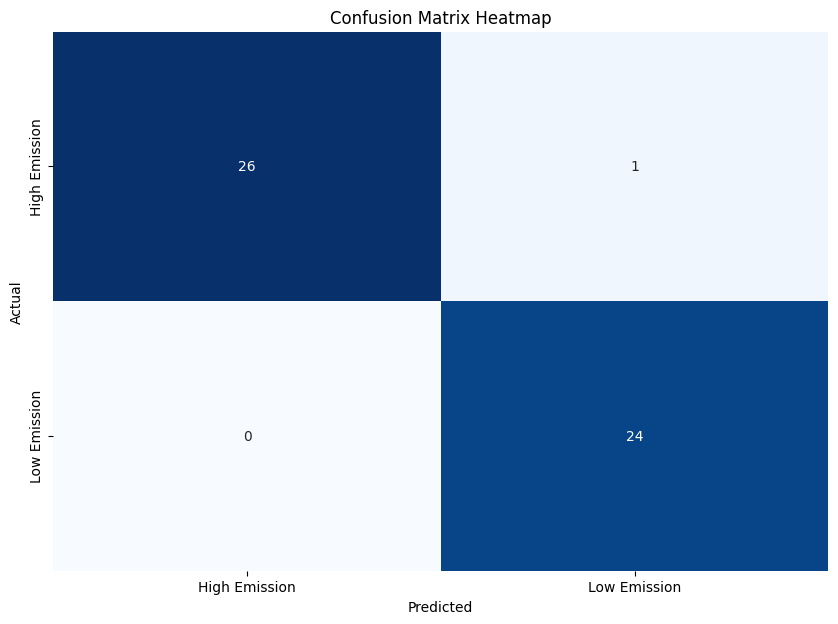

In [38]:
class_labels = ['High Emission', 'Low Emission'] 

plt.figure(figsize=(10, 7))  
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, cbar=False)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


## Insights Based on the Findings:

1. Model Performance for High Class:
  -  The model's precision for the High class is perfect (1.00), meaning it rarely makes a false positive prediction when it identifies a High. However, the recall is 0.96, indicating that the model missed a few High instances (4% of them). This means there were some actual High instances that the model classified as Low.

2. Model Performance for Low Class:

 -  The precision for the Low class is 0.96, meaning that when the model predicts Low, it is correct 96% of the time. The recall is perfect (1.00), meaning the model identified every true Low instance.
   
3. Balanced Performance:

 -  The F1-scores for both classes are 0.98, which is a sign of balanced precision and recall. The model is not overfitting or underfitting to either class.
   
4. High Accuracy:

-  With an overall accuracy of 98%, the model is making very few mistakes. This high accuracy is supported by the high precision, recall, and F1-scores for both classes.
  
#### Conclusion:
  -  The model is performing exceptionally well in predicting the emissions category (High vs Low) based on the features X provided.
    
  -  The precision and recall for each class indicate that the model is good at both correctly identifying each class and minimizing false positives and false negatives, especially for the Low class, where recall is perfect.

  -  The accuracy and F1-scores reflect a balanced and efficient model.


This suggests that the features chosen to represent the data (even after dropping emissions-related columns) are effective at distinguishing between High and Low emissions categories. However, it’s still important to keep monitoring whether more features could improve the model further, especially in identifying instances of High emissions.